# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Fauzan Ariyatmoko
- **Email:** fauzan.ariyatmoko@gmail.com
- **ID Dicoding:** muhammad_fauzan_a

## Pertanyaan Bisnis

- Berapa jumlah rata-rata penyewaan sepedah per jam, dan bagaimana variasinya pada setiap bulannya?

- Berapa jumlah rata-rata penyewaan sepedah per jam, dan bagaimana variasinya sepanjang hari?

- Bagaimana pengaruh kondisi cuaca terhadap jumlah rata-rata pernyewaan sepedah?

- Bagaaimana pengaruh hari libur tertentu terhadap kenaikan atau penurunan rata-rata Penyewaan setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print("Jumlah baris di DataFrame day:", day_df.shape[0])

Jumlah baris di DataFrame day: 731


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
print("Jumlah baris di DataFrame hour:", hour_df.shape[0])

Jumlah baris di DataFrame hour: 17379


### Assessing Data

**Mengecek setiap data pada DataFrame**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Menggabungkan setiap data-data menjadi satu DataFrame**

In [9]:
all_bike_df = hour_df.merge(day_df, on = 'dteday', how = 'inner', suffixes = ('_hour','_day'))
all_bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [10]:
all_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

### Cleaning Data

**Menilai setiap DataFrame pada bike_df**

In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi data day_df: ", day_df.duplicated().sum())

Jumlah duplikasi data day_df:  0


In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
print("Jumlah duplikasi data hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi data hour_df:  0


In [15]:
all_bike_df.isna().sum()

instant_hour       0
dteday             0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
instant_day        0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dtype: int64

In [16]:
print("Jumlah duplikasi data all_bike_df: ", all_bike_df.duplicated().sum())

Jumlah duplikasi data all_bike_df:  0


**Setelah dilakukan pengecheckan pada setiap DataFrame terlihat bahwa tidak ada data yang terduplikasi, sehingga dapat dikatakan bahwa data telah bersih**

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
all_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

In [18]:
label_musim = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}
all_bike_df['label_musim'] = all_bike_df['weathersit_day'].map(label_musim)

In [19]:
all_bike_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,label_musim
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


### Menambahkan Label Musim pada data

In [20]:
all_bike_df.groupby('label_musim')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,label_musim,cnt_day
2,Hujan Ringan,1914.700855
0,Berkabut,4062.717595
1,Cerah,4895.177083


### Mengkelompokan Data per bulan dengan Data per jam

In [21]:
all_bike_df.groupby('mnth_hour')['cnt_hour'].mean().reset_index()

,mnth_hour,cnt_hour
0,1,94.424773
1,2,112.865026
2,3,155.410726
3,4,187.260960
4,5,222.907258
5,6,240.515278
6,7,231.819892
7,8,238.097627
8,9,240.773138
9,10,222.158511


In [22]:
all_bike_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [23]:
all_bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [24]:
all_bike_df.registered_hour.sum()

2672662

In [25]:
all_bike_df.registered_day.sum()

63943480

In [26]:
all_bike_df.to_csv("dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Berapa jumlah rata-rata penyewaan sepedah per jam, dan bagaimana variasinya pada setiap bulannya?

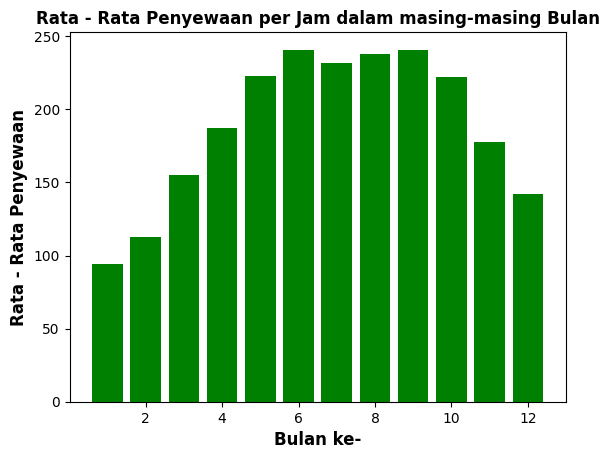

In [27]:
rental_jam = all_bike_df.groupby('mnth_hour')['cnt_hour'].mean()

plt.bar(rental_jam.index, rental_jam.values, color='green')

plt.title('Rata - Rata Penyewaan per Jam dalam masing-masing Bulan', fontsize=12, fontweight='bold')
plt.xlabel('Bulan ke-', fontsize=12, fontweight='bold')
plt.ylabel('Rata - Rata Penyewaan', fontsize=12, fontweight='bold')

plt.show()

Rata-rata penyewaan sepedah paling banyak terjadi pada bulan ke 6 dan bulan ke 9, sedangkan paling sedikit pada bulan ke 1.

### Berapa jumlah rata-rata penyewaan sepedah per jam, dan bagaimana variasinya sepanjang hari?

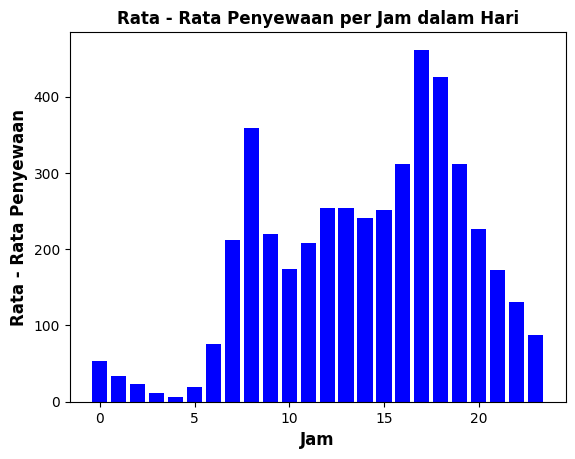

In [28]:
rental_jam = all_bike_df.groupby('hr')['cnt_hour'].mean()
plt.bar(rental_jam.index, rental_jam.values, color='blue')

plt.title('Rata - Rata Penyewaan per Jam dalam Hari', fontsize=12, fontweight='bold')
plt.xlabel('Jam', fontsize=12, fontweight='bold')
plt.ylabel('Rata - Rata Penyewaan', fontsize=12, fontweight='bold')

plt.show()

Rata-rata penyewaan sepedah paling banyak terjadi pada jam 17.00 dan 18.00 (jam 5 dan 6 sore), sedangkan paling sedikit pada jam 4 pagi.

### Bagaimana pengaruh kondisi cuaca terhadap jumlah rata-rata pernyewaan sepedah?

Total number of bike rentals: 10872.595532992458


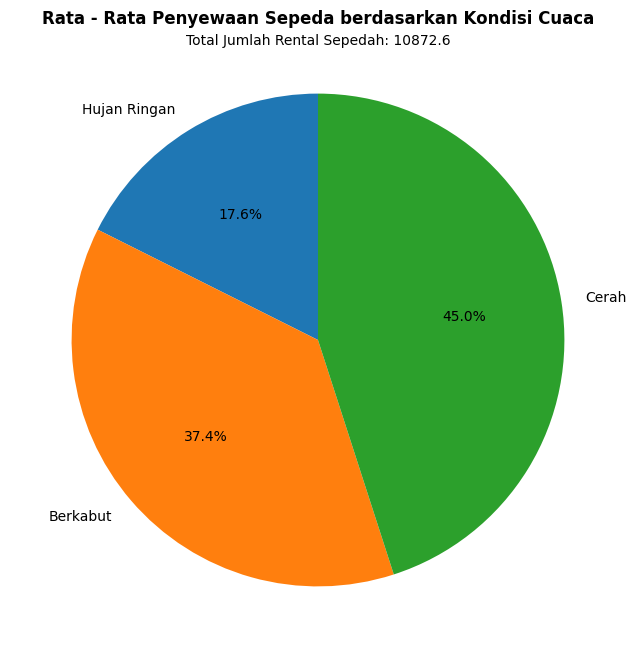

In [29]:
avg_weather = all_bike_df.groupby('label_musim')['cnt_day'].mean().reset_index().sort_values("cnt_day")
total_rentals = avg_weather['cnt_day'].sum()
labels = avg_weather['label_musim']
sizes = avg_weather['cnt_day']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: '{:.1f}%'.format(pct), startangle=90)
plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Kondisi Cuaca', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.text(0, 1.2, f"Total Jumlah Rental Sepedah: {round(total_rentals, 1)}", ha='center')
print(f"Total number of bike rentals: {total_rentals}")

plt.show()

Kondisi cuaca dengan jumlah persentase dari rata-rata penyewaan sepedah mempunyai hubungan seperti pada visualisasi data diatas. Persentase penyewaan paling banyak terjadi pada saat cuaca cerah yakni sebesar 45% dari kurang lebih 10872,6 sepedah dan paling sedikit terjadi pada saat cuaca hujan ringan yakni sebesar 17.6% dari kurang lebih 10872,6 sepedah.

### Bagaaimana pengaruh hari libur tertentu terhadap kenaikan atau penurunan rata-rata Penyewaan setiap harinya?

C:\Users\Fauzan\AppData\Local\Temp\ipykernel_7512\794196846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='PuOr')


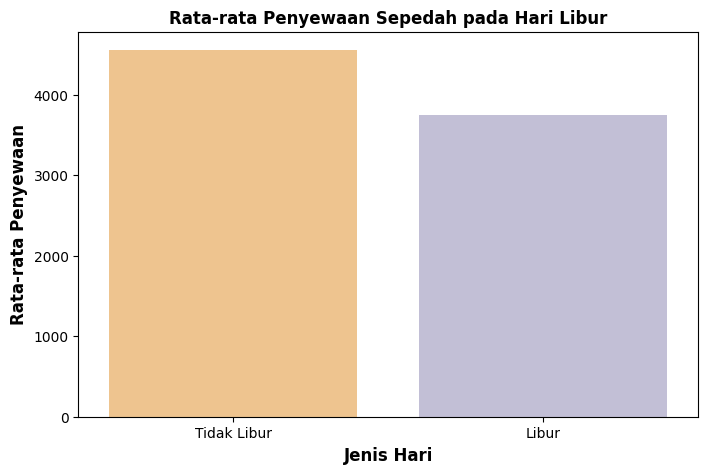

In [30]:

avg_holiday = all_bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='PuOr')

plt.title('Rata-rata Penyewaan Sepedah pada Hari Libur', fontsize=12, fontweight='bold')
plt.xlabel('Jenis Hari', fontsize=12, fontweight='bold')
plt.ylabel('Rata-rata Penyewaan', fontsize=12, fontweight='bold')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'])

plt.show()

Rata-rata penyewaan sepedah paling banyak terjadi pada saat hari tidak libur.

## Kesimpulan (*Conclusion*)

### Kesimpulan Pertanyaan pertama
**Berapa jumlah rata-rata penyewaan sepedah per jam, dan bagaimana variasinya pada setiap bulannya?**

Grafik pertanyaan pertama menunjukkan bahwa rata-rata penyewaan sepeda paling banyak terjadi pada bulan ke-6 dan bulan ke-9, sedangkan paling sedikit pada bulan ke-1. Hal ini dapat disimpulkan dari grafik melalui observasi tinggi-rendahnya puncak garis pada setiap bulan. Variasi jumlah penyewaan sepeda dari bulan ke bulan dapat memberikan informasi tentang pola permintaan yang berbeda selama tahun tersebut. Informasi ini dapat membantu dalam perencanaan operasional dan pengelolaan inventaris sepeda.

### Kesimpulan Pertanyaan kedua
**Berapa jumlah rata-rata penyewaan sepedah per jam, dan bagaimana variasinya sepanjang hari?**

Grafik pertanyaan kedua menunjukkan bahwa rata-rata penyewaan sepeda paling banyak terjadi pada jam 17.00 dan 18.00 (jam 5 dan 6 sore), sementara paling sedikit pada jam 4 pagi. Hal ini dapat dilihat dari puncak-puncak garis pada grafik pada jam-jam tertentu. Variasi jumlah penyewaan sepeda sepanjang hari memberikan gambaran tentang pola permintaan harian. Informasi ini dapat digunakan untuk mengatur jadwal pengiriman sepeda, penambahan staf, dan perencanaan pemeliharaan sepeda.

### Kesimpulan Pertanyaan ketiga
**Bagaimana pengaruh kondisi cuaca terhadap jumlah rata-rata pernyewaan sepedah?**

Grafik pertanyaan ketiga menggambarkan hubungan antara kondisi cuaca dan persentase penyewaan sepeda. Dapat dilihat bahwa persentase penyewaan sepeda paling tinggi terjadi pada cuaca cerah, yang mencapai sekitar 45% dari rata-rata penyewaan sepeda sebesar 10.872,6. Di sisi lain, persentase penyewaan sepeda paling rendah terjadi pada cuaca hujan ringan, sebesar 17,6% dari rata-rata penyewaan sepeda tersebut. Informasi ini menunjukkan bahwa cuaca cerah lebih mempengaruhi minat penyewaan sepeda dibandingkan dengan kondisi cuaca lainnya. Pemahaman ini dapat membantu dalam perencanaan pemasaran, promosi, dan pengembangan layanan yang lebih baik berdasarkan pola cuaca.

### Kesimpulan Pertanyaan keempat
**Bagaaimana pengaruh hari libur tertentu terhadap kenaikan atau penurunan rata-rata Penyewaan setiap harinya?**

Grafik pertanyaan keempat menampilkan rata-rata penyewaan sepeda pada hari libur dan hari tidak libur. Dapat dilihat bahwa penyewaan sepeda paling banyak terjadi pada hari-hari yang bukan hari libur. Hal ini mengindikasikan bahwa permintaan penyewaan sepeda cenderung lebih tinggi pada hari-hari biasa daripada pada hari libur tertentu. Informasi ini dapat membantu dalam perencanaan persediaan sepeda, pengaturan jadwal pengiriman, dan pengelolaan sumber daya untuk mengoptimalkan pendapatan dan kepuasan pelanggan.